In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

df.drop(columns['RowNumber','CustomerId','Surname'],inplace=True)

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

KeyError: "None of [Index(['Geography', 'Gender'], dtype='object')] are in the [columns]"

In [18]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [19]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [20]:
X_train.shape

(8000, 11)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [37]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [63]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.8580 - val_loss: 0.3540 - val_accuracy: 0.8506
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8586 - val_loss: 0.3530 - val_accuracy: 0.8519
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3452 - accuracy: 0.8573 - val_loss: 0.3552 - val_accuracy: 0.8481
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8577 - val_loss: 0.3543 - val_accuracy: 0.8562
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8577 - val_loss: 0.3532 - val_accuracy: 0.8537
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3429 - accuracy: 0.8600 - val_loss: 0.3532 - val_accuracy: 0.8544
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8583 - val_loss: 0.3529 - val_accuracy: 0.8550

In [64]:
model.layers

In [65]:
model.layers[0].get_weights()

[array([[ 1.24893233e-01, -8.92365798e-02, -2.04103708e-01,
         -1.83292150e-01,  1.32793486e-01, -1.07577041e-01,
         -8.17885399e-02, -1.93719208e-01, -1.70681641e-01,
         -1.13995418e-01, -3.73537242e-02],
        [-3.63092005e-01,  6.98051095e-01,  7.48405337e-01,
          1.61705896e-01, -1.45804331e-01,  1.11414099e+00,
          6.17415130e-01,  4.92307484e-01, -4.59626503e-03,
         -7.68215537e-01, -3.32239449e-01],
        [-3.49020302e-01,  5.91992699e-02,  3.76168013e-01,
          3.77904356e-01,  2.15145260e-01, -3.78761720e-03,
         -1.11268624e-03, -2.77263280e-02,  5.33367097e-01,
         -3.55146267e-02, -2.61235774e-01],
        [-1.88236296e-01, -5.21662412e-04, -3.12461466e-01,
          4.56563354e-01,  1.56808361e-01, -4.44396846e-02,
         -3.60316038e-01, -1.34159118e-01, -4.31753904e-01,
         -1.22192904e-01, -4.65356946e-01],
        [-1.80176675e-01,  9.19695735e-01, -2.60533422e-01,
          5.57130575e-01,  4.44324166e-02,  

In [66]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [67]:
y_pred=np.where(y_log>0.5,1,0)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

In [70]:
import matplotlib.pyplot as plt


In [71]:
history.history

{'loss': [0.3478541672229767,
  0.34638336300849915,
  0.3451635241508484,
  0.34450480341911316,
  0.34354671835899353,
  0.34293845295906067,
  0.3424941897392273,
  0.3411291539669037,
  0.34076932072639465,
  0.33976706862449646,
  0.3396362066268921,
  0.3390665352344513,
  0.33841225504875183,
  0.33746135234832764,
  0.3366638422012329,
  0.3370080292224884,
  0.33623939752578735,
  0.3357810080051422,
  0.3353745937347412,
  0.3348066806793213,
  0.3344618082046509,
  0.3347086012363434,
  0.3340444564819336,
  0.3334590494632721,
  0.33337634801864624,
  0.33294177055358887,
  0.33250123262405396,
  0.33208510279655457,
  0.332457959651947,
  0.3316875696182251,
  0.3315471410751343,
  0.33065590262413025,
  0.33093205094337463,
  0.3303350806236267,
  0.3302447497844696,
  0.32954132556915283,
  0.3301311433315277,
  0.3295327425003052,
  0.3294581174850464,
  0.32918983697891235,
  0.3290761709213257,
  0.3283962607383728,
  0.32837721705436707,
  0.3285921514034271,
  0.328

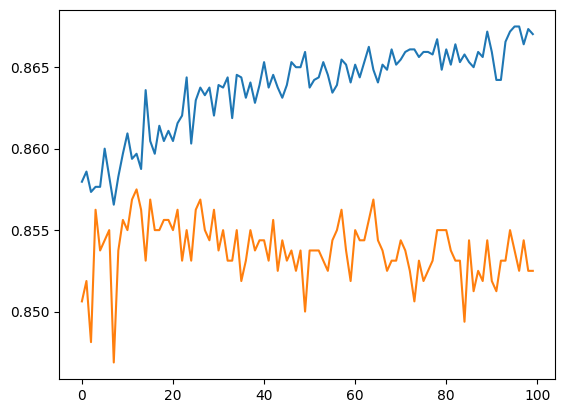

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])